In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_mpg = pd.read_csv("auto-mpg.csv")
df_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
# Size and variable type of data
df_mpg.shape

(398, 9)

The dataset has 398 observations and 9 variables

In [4]:
df_mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [5]:
# datatype conversions are required

df_mpg['horsepower'].replace({'?':None},inplace=True)
df_mpg['horsepower'] = df_mpg['horsepower'].astype('float64')

# converting origin to object as it is multi-valued discrete data
df_mpg['origin'] = df_mpg['origin'].astype('object')

In [6]:
df_mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin           object
car name         object
dtype: object

car name and origin is categorical and the other variables are numerical

In [7]:
# Duplicates check
df_mpg.duplicated().sum()

0

There are no duplicates

In [8]:
df_mpg['horsepower'].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [9]:
df_mpg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

There are 6 missing values in horsepower

In [10]:
# Descriptive statistical information
df_mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


The vehicles in this study have an average mpg of 23.5 and standard deviation of 7.8

In [11]:
# Descriptive statistics of categorical variables
df_mpg.describe(include='object')

,origin,car name
count,398,398
unique,3,305
top,1,ford pinto
freq,249,6


top indicates the mode and ford pinto occurs 6 times in this dataset

There are 305 unique car models in this observation.

In [12]:
# skewness
df_mpg.select_dtypes(include=np.number).skew()

mpg             0.457066
cylinders       0.526922
displacement    0.719645
horsepower      1.087326
weight          0.531063
acceleration    0.278777
model year      0.011535
dtype: float64

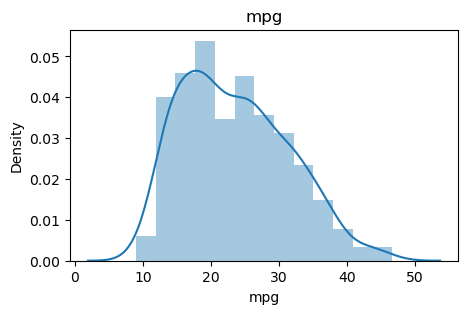

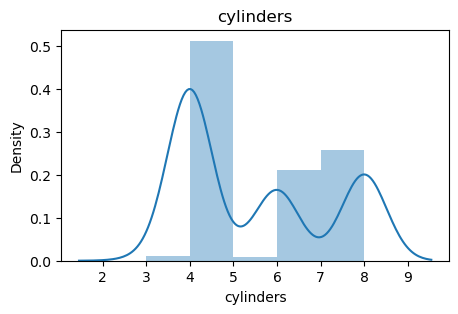

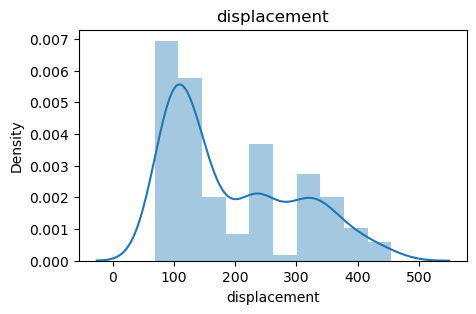

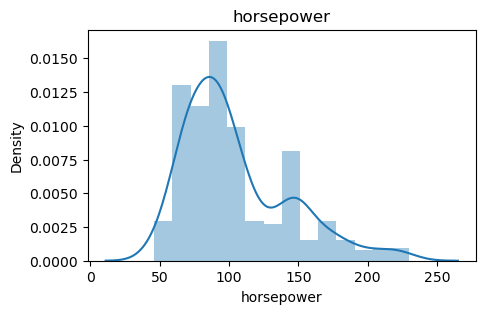

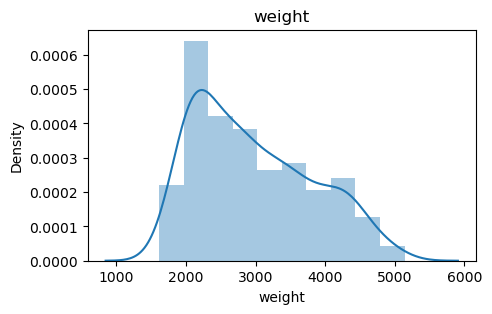

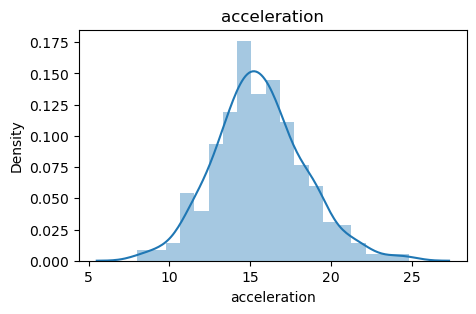

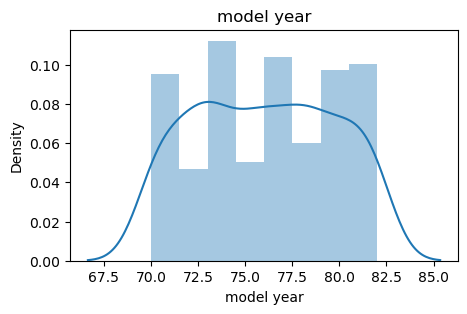

In [13]:
for i in df_mpg.select_dtypes(include=np.number):
    fig = plt.figure(figsize=(5,3))
    sns.distplot(df_mpg[i])
    plt.title(i)
    plt.show()

From the above statistical information on skewness and its distribution graph, we can identify that mpg, cylinders, displacement, horsepower, weight are positively skewed (i.e.right tailed).

Acceleration is close to symmety but positively skewed as per the skew value.

model_year is symmetrically distributed.

In [14]:
# kurtosis
df_mpg.select_dtypes(include=np.number).kurt()

mpg            -0.510781
cylinders      -1.376662
displacement   -0.746597
horsepower      0.696947
weight         -0.785529
acceleration    0.419497
model year     -1.181232
dtype: float64

The distribution of variables mpg, cylinders, displacement, weight and model year is platykuritc. Therefore, these variables have very less extreme observations.

Horsepower and Acceleration are letptokurtic. Thereby, the observations are close to mean and have observations of extreme values that make the tail longer.



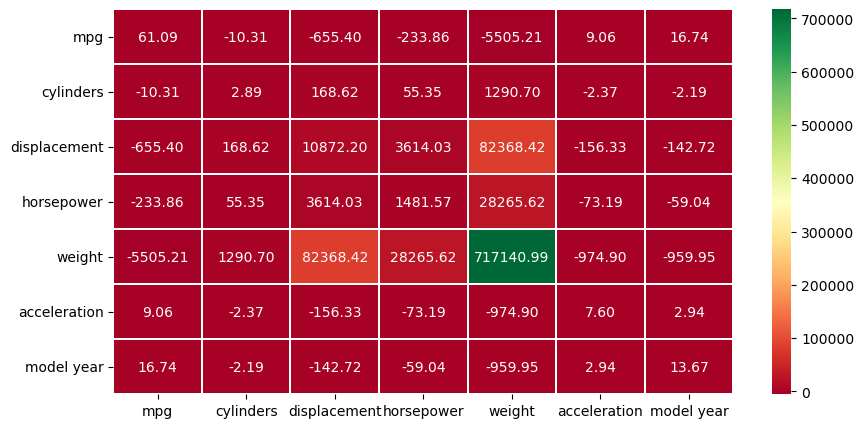

In [15]:
# Covariance

cov = df_mpg.cov()

fig,ax = plt.subplots(figsize=(10,5))
sns.heatmap(cov,annot=True,cmap='RdYlGn',linewidths=0.05,fmt='.2f')
plt.show()

The variables cylinders, displacement, horsepower weight have negative covaraiance with mpg, i.e. the increase of these varaibles will decrease the mpg.

Acceleration and model year has positive covaraince with mpg.

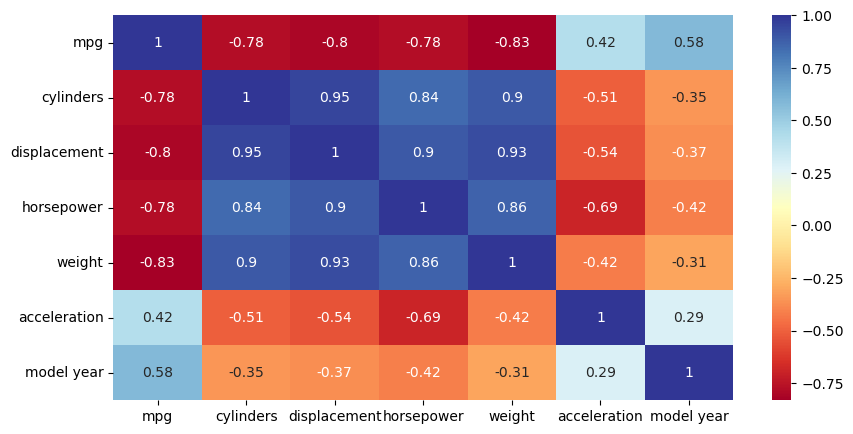

In [16]:
# Correlation

fig = plt.figure(figsize=(10,5))
sns.heatmap(df_mpg.corr(),cmap='RdYlBu',annot=True)
plt.show()

In [17]:
# ones matrix creation for the df_mpg.corr() shape
mask_ones = np.ones_like(df_mpg.corr())
mask_ones

array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]])

In [18]:
# ones in upper triangle 

mask_up = np.triu(mask_ones,k=1) 
# elements below k-th diagonal will be removed, and the diagonal starts from index 0 .i.e the middle diagonal is indexed zero
mask_up

array([[0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0.]])

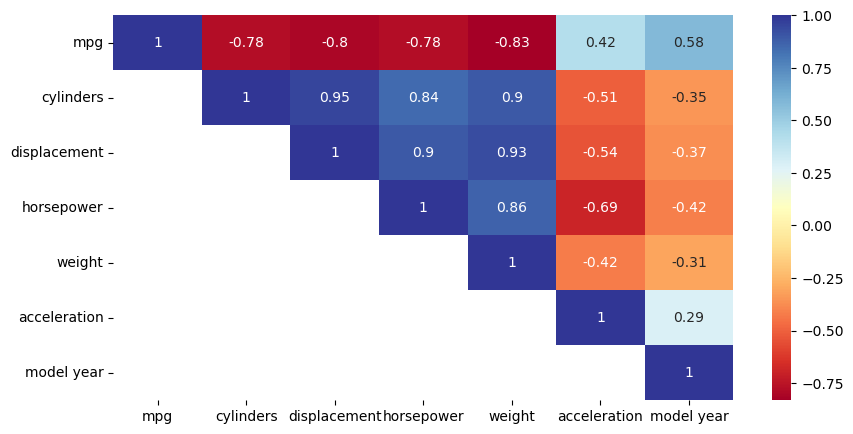

In [19]:
fig = plt.figure(figsize=(10,5))
sns.heatmap(df_mpg.corr(),cmap='RdYlBu',annot=True,mask = mask_up.transpose()) 
# 1 in mask parameter is True and is masked/hidden therefore transpose the np.triu matrix or use np.tril instead without transpose
plt.show()

Cylinders, displacement, horsepower, weight have strong negative correlation with mpg. However, accelearation and model year have moderate positive correlation with mpg.